<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2006%20-%20Boundary%20Value%20Problems/604_Boundary%20Value%20Problem%20Example%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Difference Method
#### John S Butler john.s.butler@tudublin.ie   [Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
This notebook illustrates the finite different method for a linear Boundary Value Problem.
### Example 2 Boundary Value Problem
To further illustrate the method we will apply the finite difference method to the this boundary value problem
\begin{equation}  \frac{d^2 y}{dx^2} + 2x\frac{dy}{dx}+y=3x^2,\end{equation}
with the boundary conditions
\begin{equation} y(0)=1,  y(1)=2. \end{equation}


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


## Discrete Axis
The stepsize is defined as
\begin{equation}h=\frac{b-a}{N}\end{equation}
here it is 
\begin{equation}h=\frac{1-0}{10}\end{equation}
giving 
\begin{equation}x_i=0+0.1 i\end{equation}
for $i=0,1,...10.$

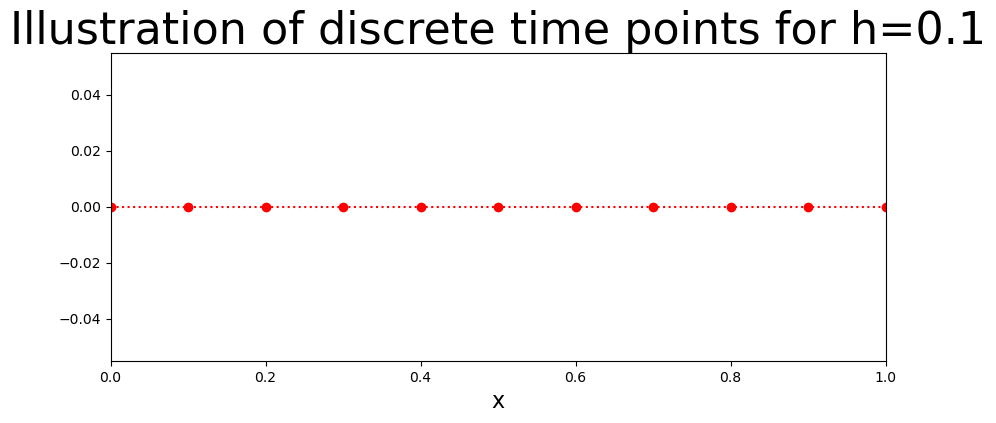

In [2]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=32)
plt.show()

## The Difference Equation
To convert the boundary problem into a difference equation we use 1st and 2nd order difference operators.

The first derivative can be approximated by the difference operators:
\begin{equation}D^{+}U_{i}=\frac{U_{i+1}-U_{i}}{h_{i+1}} \ \ \ \mbox{ Forward,} \end{equation}
\begin{equation}D^{-}U_{i}=\frac{U_{i}-U_{i-1}}{h_i} \ \ \ \mbox{ Backward,} \end{equation}
or
\begin{equation}D^{0}U_{i}=\frac{U_{i+1}-U_{i-1}}{x_{i+1}-x_{i-1}} \ \ \ \mbox{ Centered.} \end{equation}
The second derivative can be approxiamed 
\begin{equation}\delta_x^{2}U_{i}=\frac{2}{x_{i+1}-x_{i-1}}\left(\frac{U_{i+1}-U_{i}}{x_{i+1}-x_{i}}-\frac{U_{i}-U_{i-1}}{x_{i}-x_{i-1}}\right) \ \ \ \mbox{ Centered in $x$ direction} \end{equation}

Given the differential equation
\begin{equation}  \frac{d^2 y}{dx^2} + 2x\frac{dy}{dx}+y=3x^2,\end{equation}
the difference equation is,
\begin{equation}\frac{1}{h^2}\left(y_{i-1}-2y_i+y_{i+1}\right)+2x_i\frac{y_{i+1}-y_{i-1}}{2h}+y_i=3x^2_i \ \ \ i=1,..,N-1. \end{equation}

Rearranging the equation we have the system of N-1 equations
\begin{equation}i=1: (\frac{1}{0.1^2}-\frac{2x_1}{0.2})\color{green}{y_{0}} -\left(\frac{2}{0.1^2}-1\right)y_1 +(\frac{1}{0.1^2}+\frac{2x_1}{0.2}) y_{2}=3x_1^2\end{equation}
\begin{equation}i=2: (\frac{1}{0.1^2}-\frac{2x_2}{0.2})y_{1} -\left(\frac{2}{0.1^2}-1\right)y_2 +(\frac{1}{0.1^2}+\frac{2x_2}{0.2}) y_{3}=3x_2^2\end{equation}
\begin{equation} ...\end{equation}
\begin{equation}i=8: (\frac{1}{0.1^2}-\frac{2x_8}{0.2})y_{7} -\left(\frac{2}{0.1^2}-1\right)y_8 +(\frac{1}{0.1^2}+\frac{2x_8}{0.2})y_{9}=3x_8^2\end{equation}
\begin{equation}i=9: (\frac{1}{0.1^2}-\frac{2x_9}{0.2})y_{8} -\left(\frac{2}{0.1^2}-1\right)y_9 +(\frac{1}{0.1^2}+\frac{2x_9}{0.2}) \color{green}{y_{10}}=3x_9^2\end{equation}
where the green terms are the known boundary conditions.

Rearranging the equation we have the system of 9 equations
\begin{equation}i=1:  -\left(\frac{2}{0.1^2}-1\right)y_1 +(\frac{1}{0.1^2}+\frac{2x_1}{0.2})y_{2}=-(\frac{1}{0.1^2}-\frac{2x_1}{0.2})\color{green}{y_{0}}+3x_1^2\end{equation}
\begin{equation}i=2: (\frac{1}{0.1^2}-\frac{2x_2}{0.2})y_{1} -\left(\frac{2}{0.1^2}-1\right)y_2 +(\frac{1}{0.1^2}+\frac{2x_2}{0.2}) y_{3}=3x_2^2\end{equation}
\begin{equation} ...\end{equation}
\begin{equation}i=8: (\frac{1}{0.1^2}-\frac{2x_8}{0.2})y_{7} -\left(\frac{2}{0.1^2}-1\right)y_8 +(\frac{1}{0.1^2}+\frac{2x_8}{0.2}) y_{9}=3x_8^2\end{equation}
\begin{equation}i=9: (\frac{1}{0.1^2}-\frac{2x_9}{0.2})y_{8} -\left(\frac{2}{0.1^2}-1\right)y_9 =-(\frac{1}{0.1^2}+\frac{2x_9}{0.2}) \color{green}{y_{10}}+3x_9^2\end{equation}
where the green terms are the known boundary conditions.
This is system can be put into matrix form 
\begin{equation}  A\color{red}{\mathbf{y}}=\mathbf{b} \end{equation}
Where A is a $9\times 9 $ matrix of the form

which can be represented graphically as:

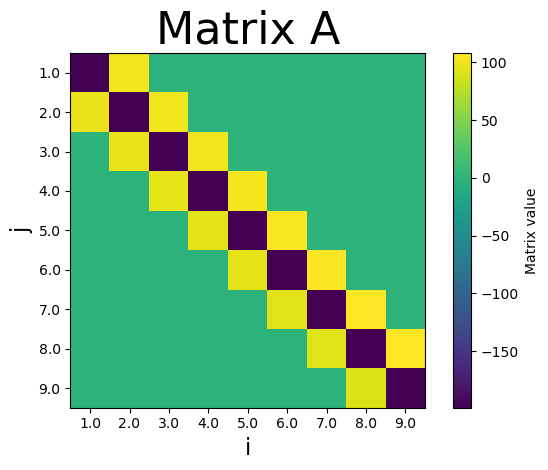

In [3]:
A=np.zeros((N-1,N-1))
# Diagonal
for i in range (0,N-1):
    A[i,i]=-(2/(h*h)-1) # Diagonal

for i in range (0,N-2):           
    A[i+1,i]=1/(h*h)-2*(i+1)*h/(2*h) ## Lower Diagonal
    A[i,i+1]=1/(h*h)+2*(i+1)*h/(2*h) ## Upper Diagonal
    
plt.imshow(A)
plt.xlabel('i',fontsize=16)
plt.ylabel('j',fontsize=16)
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
plt.title('Matrix A',fontsize=32)
plt.tight_layout()
plt.subplots_adjust()
plt.show()

$\mathbf{y}$ is the unknown vector which is contains the numerical approximations of the $y$. 
\begin{equation}
\color{red}{\mathbf{y}}=\color{red}{
\left(\begin{array}{c} y_1\\
y_2\\
y_3\\
.\\
.\\
y_8\\
y_9
\end{array}\right).}
\end{equation}

In [4]:
y=np.zeros((N+1))
# Boundary Condition
y[0]=1
y[N]=2

and the known right hand side is a known $9\times 1$ vector with the boundary conditions
\begin{equation}
\mathbf{b}=\left(\begin{array}{c}-99+3x_1^2\\
3x_2^2\\
3x_3^2\\
.\\
.\\
3x_8^2\\
-209+3x_9^2 \end{array}\right)
\end{equation}


In [5]:
b=np.zeros(N-1)
for i in range (0,N-1):
    b[i]=3*h*(i+1)*h*(i+1)
# Boundary Condition
b[0]=-y[0]*(1/(h*h)-2*1*h/(2*h))+b[0]
b[N-2]=-y[N]*(1/(h*h)+2*9*h/(2*h))+b[N-2]
print('b=')
print(b)

b=
[-9.8970e+01  1.2000e-01  2.7000e-01  4.8000e-01  7.5000e-01  1.0800e+00
  1.4700e+00  1.9200e+00 -2.1557e+02]


## Solving the system
To solve invert the matrix $A$ such that 
\begin{equation}A^{-1}Ay=A^{-1}b\end{equation}
\begin{equation}y=A^{-1}b\end{equation}
The plot below shows the graphical representation of $A^{-1}$.

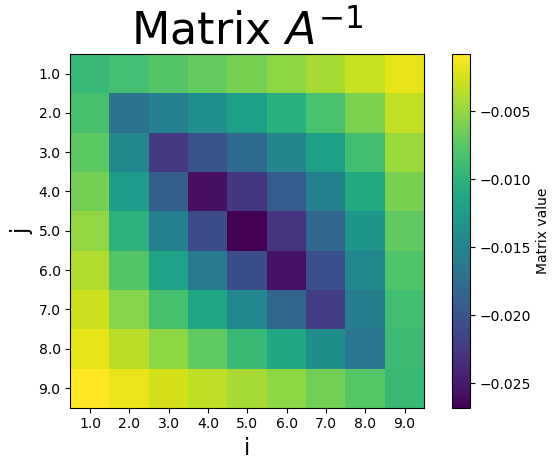

In [6]:
invA=np.linalg.inv(A)

plt.imshow(invA)
plt.xlabel('i',fontsize=16)
plt.ylabel('j',fontsize=16)
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
plt.title(r'Matrix $A^{-1}$',fontsize=32)
plt.tight_layout()
plt.subplots_adjust()
plt.show()


y[1:N]=np.dot(invA,b)

## Result 
The plot below shows the approximate solution of the Boundary Value Problem (blue v).

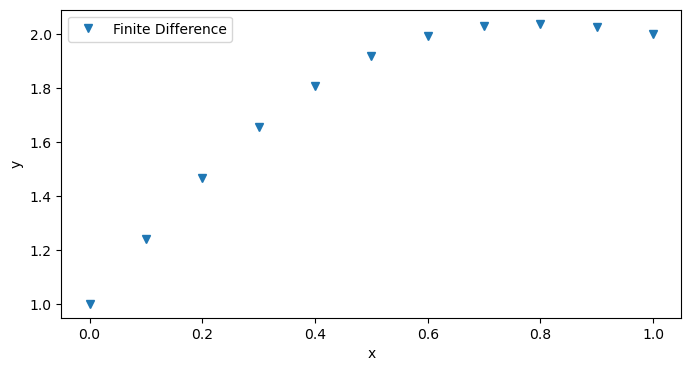

In [7]:
fig = plt.figure(figsize=(8,4))

plt.plot(x,y,'v',label='Finite Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()